<a href="https://colab.research.google.com/github/prioaji/e_commerce_data_analysis/blob/main/E_Commerce_Data_Analysis_(Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#R Code : Data Analysis & Visualization from E-Commerce Data <br>
Data Analysis process has main steps, those are :
1. Define Problem or Business Needs (Ask).
2. Prepare Data (Prepare).
3. Clean and Transform Data (Process).
4. Show significant information with making chart (Visualize).
5. Make presentation for stakeholders (Share).

This Notebook contains step 2-3.

## 1. Workspace & Data Preparation
Firstly, we will prepare our packages to do data analysis and the data itself. If you are new to data analysis with R, packages i used bellow is the most essential to install. With those packages, we can retrieve, explore, manipulate, transform, and visualize data.

*You have to run the code bellow in sequence, the code has dependency to other code on its above.

In [1]:
install.packages('tidyverse')
library(dplyr)
library(ggplot2)
library(lubridate)
library(readr)
library(tidyr)
library(tibble)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




We use data from my github repository and retrieved to this notebook with code bellow.

In [2]:
url <- "https://raw.githubusercontent.com/prioaji/e_commerce_data_analysis/ce7d91bd66bd5dd0d04ba62442bd1f588f39aba6/file_out2.csv"
file_out2 <- read.csv(url)

## 2. Data Transformation
I have already explored the data and the changes needed are :
- Make a column "discount_percent" to get discount in percent. If the discount value is negative, it would be changed to 0.
- Make a column "count_trans" to ease counting rows.

Data table in R named a dataframe. We name this dataframe as "transaction".

In [3]:
transaction <-
  file_out2 %>% #using dataframe from github above
  select_all %>%
  mutate(discount_percent = if_else(Discount>0,Discount/TotalSales,0)) %>% #make a new column "discount_percent"
  mutate(count_trans = 1) #making a new column "count_trans"

transaction

X,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,discount_percent,count_trans
<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
0,328,2019-12-27,1684,796.6102,143.38983,185,4,0.18,1
1,329,2019-12-27,524,355.9322,64.06780,185,2,0.18,1
2,330,2019-12-27,192,901.6949,162.30508,230,4,0.18,1
3,330,2019-12-27,218,182.7542,32.89576,230,1,0.18,1
4,330,2019-12-27,247,780.1017,140.41831,230,4,0.18,1
5,330,2019-12-27,252,1123.9661,202.31390,230,4,0.18,1
6,330,2019-12-27,486,1251.0847,225.19525,230,4,0.18,1
7,330,2019-12-27,487,805.0847,144.91525,230,2,0.18,1
8,330,2019-12-27,1793,1175.4237,211.57627,230,4,0.18,1


We gonna make 1 more dataframe. In this df, we need to identify transaction each customer and each year. To summarise by 'CustomerID' and 'year' i unite column then separate it again. Later i learned that group_by() function appropiate for 2 column.

In [4]:
cust_retention <- transaction %>%
  mutate(year = str_sub(Date,1,4)) %>% #get year from date
  mutate(count = 1) %>%
  relocate(year,.after = CustomerID) %>% #move "year" column after "CustomerID"
  unite(cust_year,CustomerID:year,sep = "-") %>% #"cust_year" is a dummy to summarise by "CustomerID" and "year"
  group_by(cust_year) %>%
  summarise(discount_value=sum(Discount),trans_value=sum(TotalSales),number_of_trans=sum(count), avg_disc = mean(discount_percent, na.rm = TRUE)) %>%
  separate(cust_year, into = c("customer_id","year"),sep = "-") #separate the dummy "cust_year"

cust_retention


customer_id,year,discount_value,trans_value,number_of_trans,avg_disc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,2022,24941.7824,138565.458,26,0.1523077
0,2023,22499.1031,124995.017,25,0.1584000
1,2019,1829.0654,10161.475,7,0.1800000
1,2020,793.9831,4411.017,4,0.1800000
1,2021,1062.7627,5904.237,2,0.1800000
10,2021,10421.8475,57899.153,15,0.1800000
10,2022,13502.6573,75014.763,18,0.1800000
10,2023,11593.8808,64410.449,12,0.1800000
100,2019,2904.0254,16133.475,17,0.1800000


## 3. Data Visualization

## 3.1 How many total transaction per year?

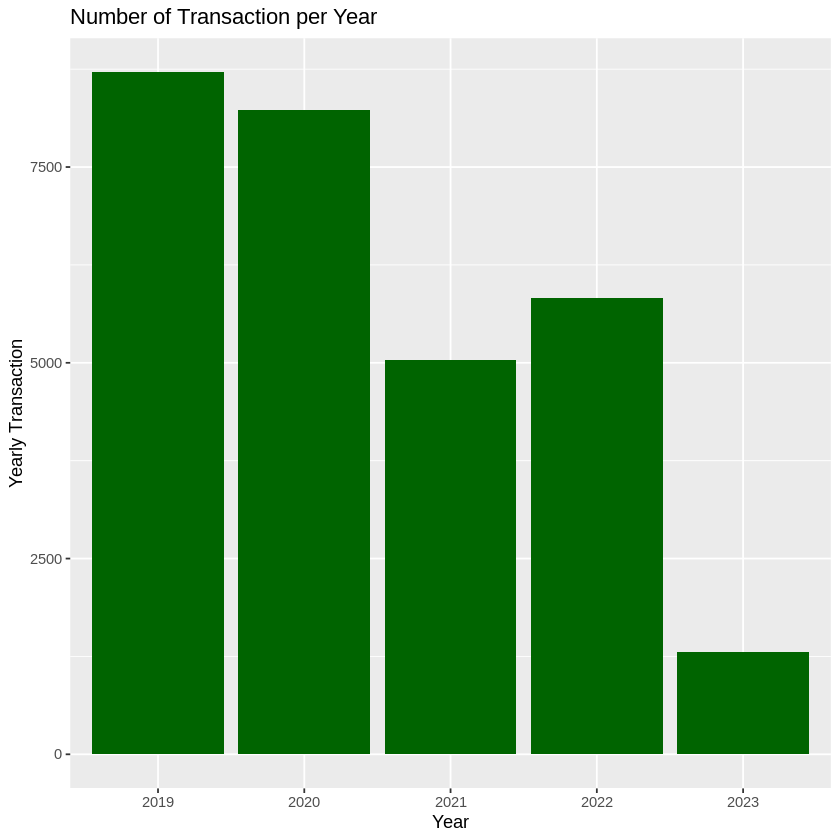

In [5]:
cust_retention %>%
  ggplot(cust_retention, mapping=aes(x=year,y=number_of_trans)) + #selecting df and choose column to plot in x or y axis
  geom_col(fill = "darkgreen")+ #using column chart type and set its color to drakgreen
  labs(x='Year',y='Yearly Transaction',title = 'Number of Transaction per Year') #adding a tittle etc.

## 3.2 How is the daily transaction patern?

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


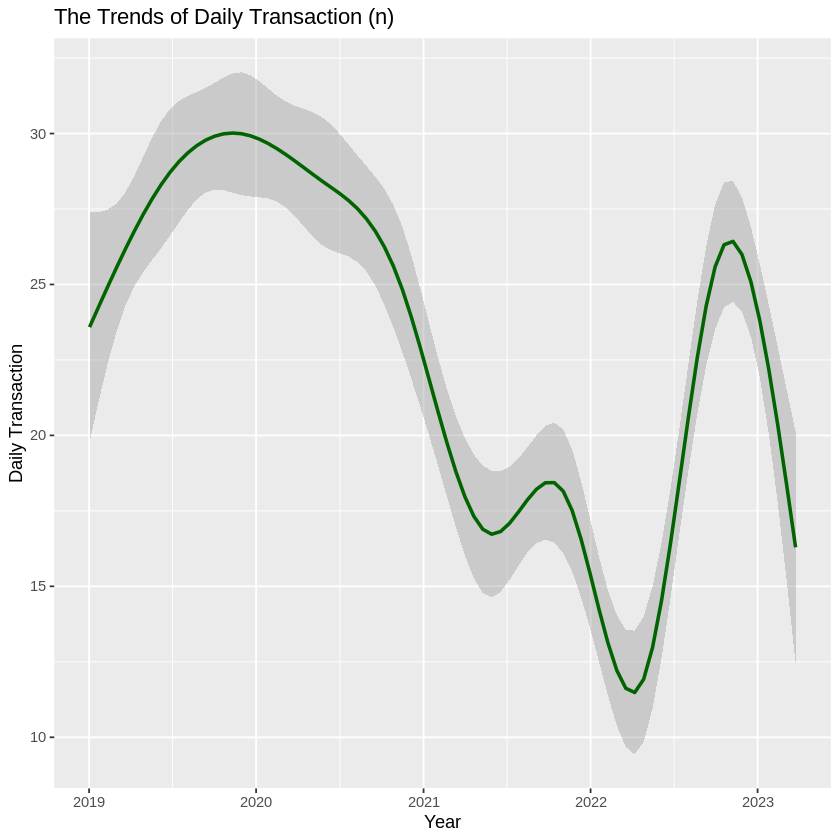

In [6]:
transaction_2 <-
  transaction %>%
  group_by(Date) %>%
  mutate(Date = as.Date(Date)) %>%  #change str to date data type
  arrange(Date) %>%
  summarise(n_of_trans = sum(count_trans)) #total count of transaction per day

transaction_2 %>%
  ggplot(transaction_2, mapping=aes(x=Date,y=n_of_trans)) + geom_smooth(color="darkgreen") +
  labs(x='Year',y='Daily Transaction',title = 'The Trends of Daily Transaction (n)')


## 3.3 How is the trend of daily transaction value($)?



`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


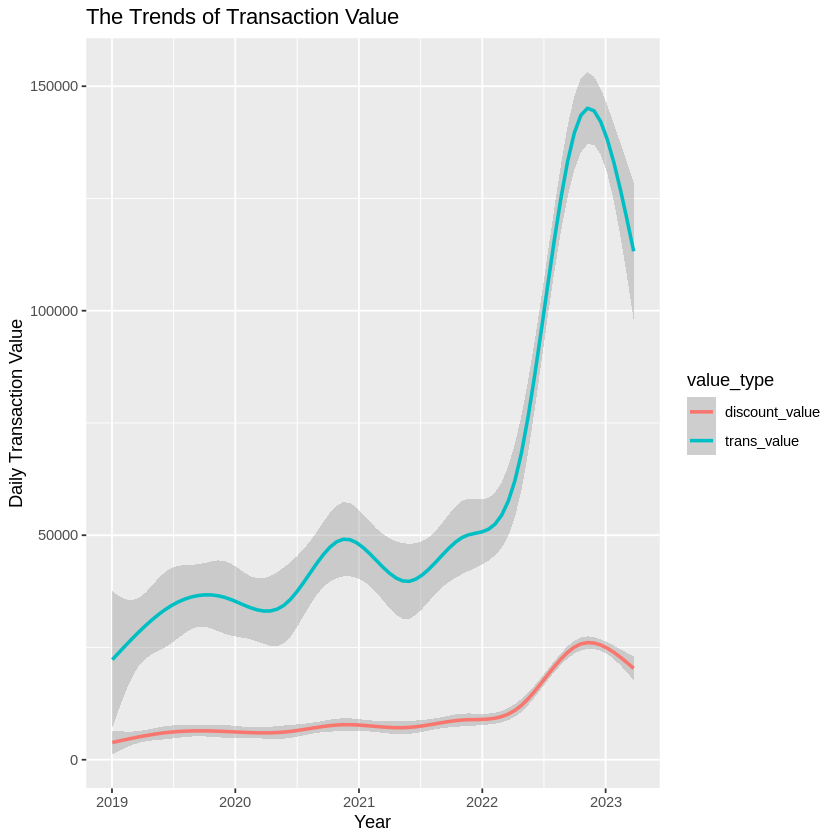

In [7]:
transaction_3 <-
  transaction %>%
  group_by(Date) %>%
  mutate(Date = as.Date(Date)) %>%
  arrange(Date) %>%
  summarise(trans_value = sum(TotalSales),discount_value = sum(Discount)) %>%
  pivot_longer(trans_value:discount_value, names_to = "value_type",values_to = "value") #because we want to make 2 line in 1 chart we used new column to indetify it

transaction_3 %>%
  ggplot(transaction_3, mapping = aes(x = Date, y = value, color = value_type)) + #differ color of transaction value and discount
  geom_smooth() +
  labs(x = 'Year', y = 'Daily Transaction Value',title = 'The Trends of Transaction Value')


## 3.4 How is the trend of discount ratio?

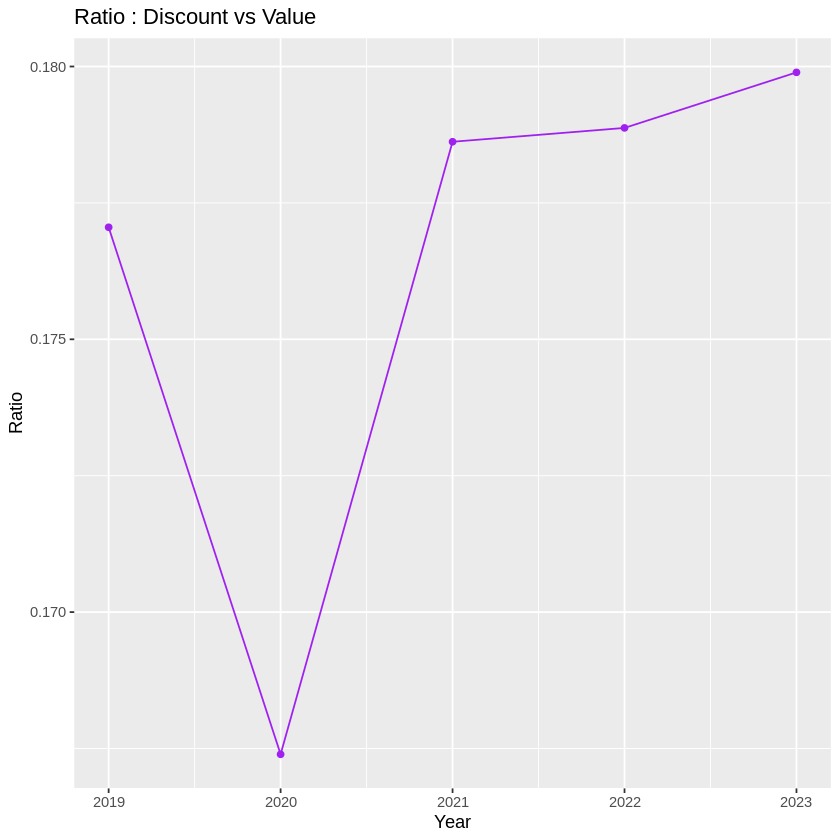

In [8]:
transaction %>%
  mutate(year=year(Date)) %>%
  group_by(year) %>%
  summarise(trans_value=sum(TotalSales),discount_value=sum(Discount)) %>%
  mutate(ratio = discount_value/trans_value) -> ratio_
ratio_%>%
  ggplot(transaction, mapping=aes(x=year,y=ratio)) + geom_line(color="purple") + geom_point(color="purple") + labs(x='Year',y='Ratio',title = 'Ratio : Discount vs Value')

Now we have deeper question about customer loss and customer growth. We need to check a customer if they has transaction next year or not. If a customer doenst come back, we call it **customer loss**.
Customer growth means opposite, we will check a customer if they has a transaction last year or not. If their transaction is new, they are a **new customer**.
<br>
We will make a function that check a customer one by one on two years. For example, we check customer of 2019 on 2020 to count **customer loss**.

## 3.5 Function to Check Customer

In [9]:
#disticnt customer in a year and make it as a dataframe
maketable <- function(year1){
transaction %>%
  filter(year(Date) == year1) %>%
  select(CustomerID) %>%
  distinct(CustomerID) %>%
  mutate(counts = 1)
}

In [10]:
lostcustomeryoy <- function(year_1, year_2){ #the function use 2 variable, year_1 is checked on year_2

  period1 <- maketable(year_1) %>%
    select(CustomerID)

  period2 <- maketable(year_2) %>%
    select(CustomerID)

  idxt1 <- 1

  idxt2 <- 1

  length1 <- maketable(year_1) %>%
    select_all() %>%
    summarise(sum(counts))

  length2 <- maketable(year_2) %>%
    select_all() %>%
    summarise(sum(counts))

  lost <- 0

  while(idxt1 <= length1){
    while(idxt2 <= length2){
      if(period1[idxt1,] != period2[idxt2,]){
        if (idxt2 >= length2){
          lost <- lost + 1
          idxt2 <- 1
          break
        }
        idxt2 <- idxt2 + 1
      } else if (period1[idxt1,] == period2[idxt2,]){
        idxt2 <- 1
        break
      }
    }
    idxt1 <- idxt1 + 1
  }
  lost
}

lostcustomeryoy(2019,2020) #for example


[1] 99

### Count Customer Each Year

In [12]:
# Counting customer each year
transaction %>%
  group_by(yrs = year(Date),distinct_cust = CustomerID) %>%
  summarise(n = n()) %>%
  group_by(yrs) %>%
  summarise(cust = n())

`summarise()` has grouped output by 'yrs'. You can override using the `.groups`
argument.


yrs,cust
<dbl>,<int>
2019,283
2020,245
2021,220
2022,260
2023,169


### Count Customer Loss

In [14]:
years <- c(2019:2023)
# Counting loss customer
i <- 1
while (i <= length(years)) {
  print(lostcustomeryoy((years[i]-1),years[i]))
  i <- i + 1
}

[1] 0
[1] 99
[1] 89
[1] 61
[1] 121


### Count Customer Growth

In [15]:
# Counting new customer
i <- 1
while (i <= length(years)) {
  print(lostcustomeryoy(years[i],(years[i]-1)))
  i <- i + 1
}

[1] 0
[1] 61
[1] 64
[1] 101
[1] 30


### Count Discount Ratio Each Year

In [16]:
# Counting discount ratio
transaction %>%
  mutate(year=year(Date)) %>%
  group_by(year) %>%
  summarise(trans_value = sum(TotalSales),discount_value = sum(Discount)) %>%
  mutate(ratio=discount_value/trans_value)

year,trans_value,discount_value,ratio
<dbl>,<dbl>,<dbl>,<dbl>
2019,10155779,1798115,0.1770533
2020,12214664,2044648,0.1673929
2021,12353150,2206531,0.1786209
2022,31621787,5656335,0.1788746
2023,7945241,1429292,0.1798928


### Make Data Frame Named 'growth_df'

In [18]:
# Manually making vector and data frame
year <- c("2019", "2020", "2021", "2022", "2023")
customer_count <- c(283, 245, 220, 260, 169)
customer_loss <- c(0, -99, -89, -61, -121)
customer_new <- c(0, 61, 64, 101, 30)
disc_ration <- c(0.177,0.167,0.179,0.179,0.180)

# Making Data Frame
growth_df <- data.frame(
  yr = year,
  yrs = years,
  customer = customer_count,
  loss_customer = customer_loss,
  new_customer = customer_new,
  discount_ratio = disc_ration
)

growth_df

yr,yrs,customer,loss_customer,new_customer,discount_ratio
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2019,2019,283,0,0,0.177
2020,2020,245,-99,61,0.167
2021,2021,220,-89,64,0.179
2022,2022,260,-61,101,0.179
2023,2023,169,-121,30,0.180


## 3.6 How many customer each year?

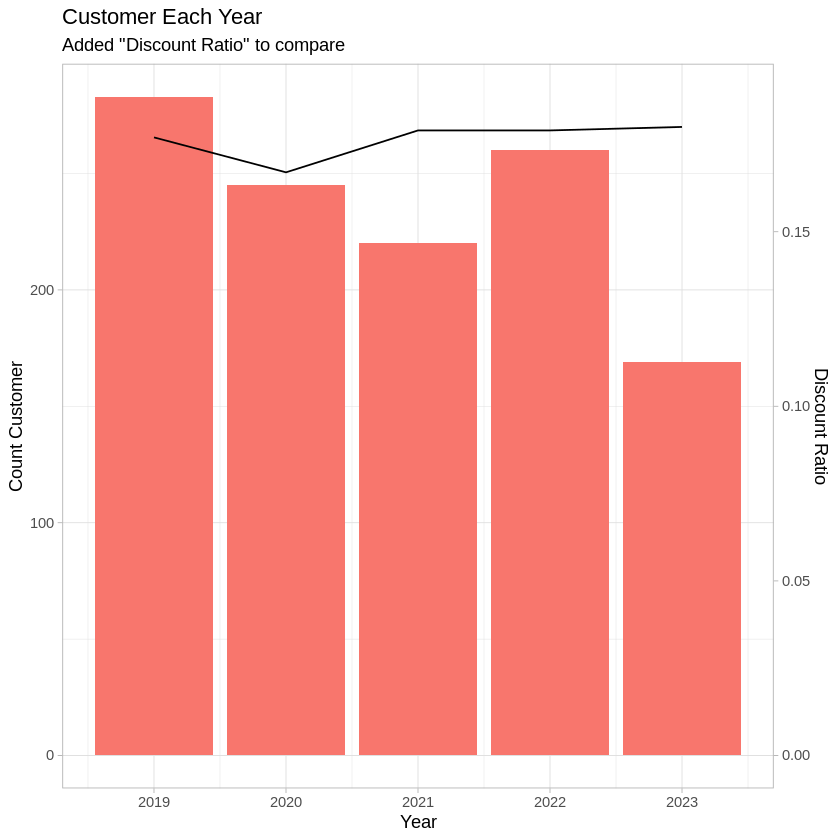

In [19]:
# Bar Chart : Count/Distinct Customer Each Year
growth_df %>% ggplot(growth_df, mapping = aes(x = yrs)) +
  geom_col(mapping = aes(y = customer, fill = "gold"), show.legend = FALSE) +
  geom_line(mapping = aes(y = discount_ratio*1500)) +
  scale_y_continuous(name = "Count Customer", sec.axis =  sec_axis(trans = ~.*(1/1500), name = "Discount Ratio")) +
  theme_light() +
  labs(x='Year', y='Count Customer', title = 'Customer Each Year', subtitle = 'Added "Discount Ratio" to compare')


## 3.7 How many new customer?

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



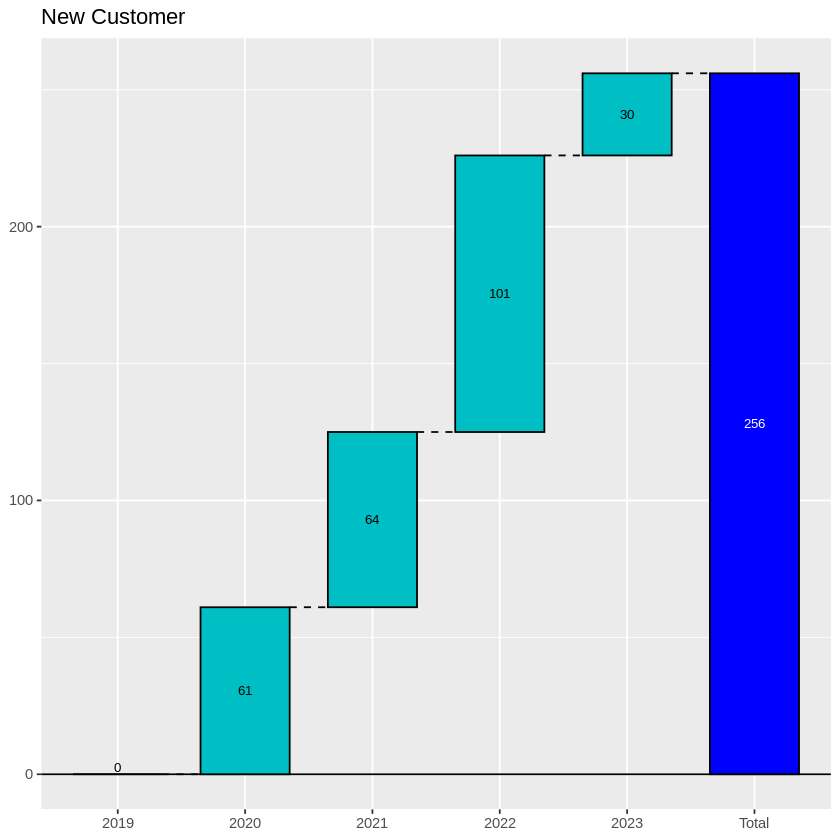

In [23]:
install.packages('waterfalls')
library(waterfalls)
growth_df %>%
  select(yr,new_customer) %>%
  waterfall(growth_df, calc_total = TRUE, total_rect_color = "blue") +
  labs(title = 'New Customer')

## 3.8 How many loss customer?

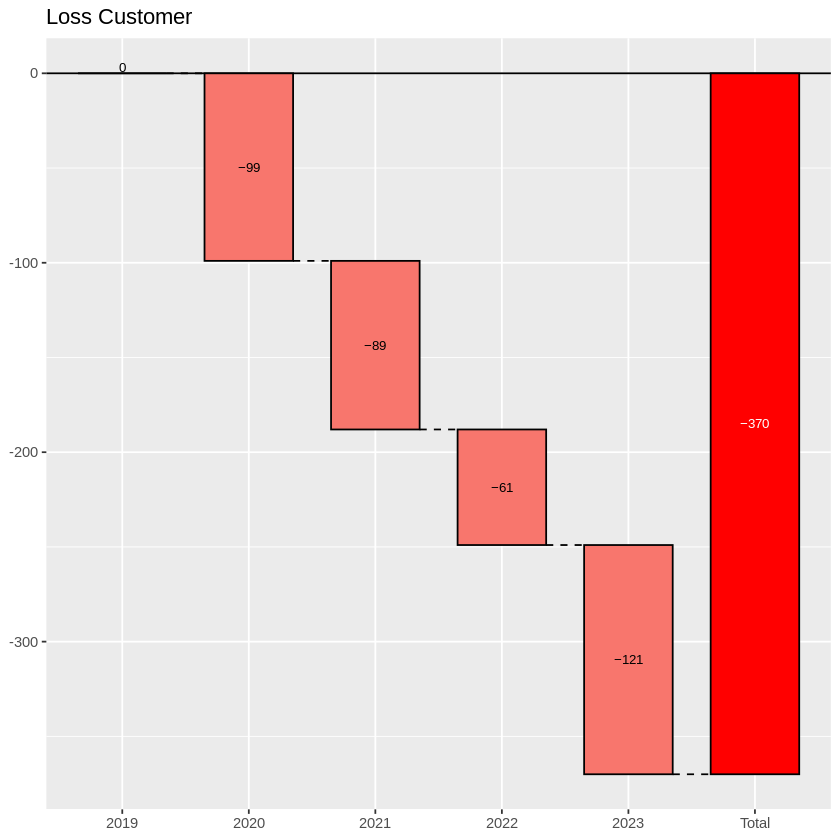

In [24]:
growth_df %>%
  select(yr,loss_customer) %>%
  waterfall(growth_df, calc_total = TRUE, total_rect_color = "red") +
  labs(title = 'Loss Customer')

## 3.9 How is our loyal customer's transaction?

`summarise()` has grouped output by 'CustomerID'. You can override using the
`.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'CustomerID'. You can override using the
`.groups` argument.
Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”


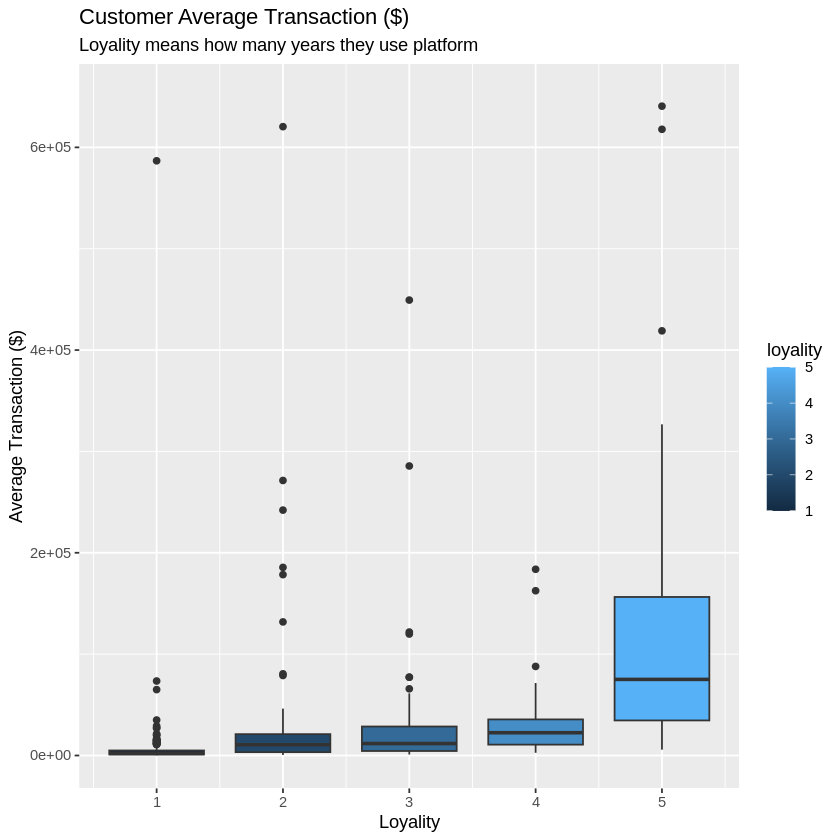

In [25]:
loyality <- {
  distinct(transaction %>%
  group_by(CustomerID, year = year(Date)) %>%
  summarise(transaction_value = sum(TotalSales)) %>%
  group_by(CustomerID) %>%
  summarise(loyality = n(), average_value = ave(transaction_value)))
}
#indentify spreadness of transaction value based on customer loyality
loyality %>%
  ggplot(loyality, mapping = aes(x = loyality, y = average_value, fill = loyality), show.legend = FALSE) +
  geom_boxplot(mapping = aes(group = loyality)) +
  scale_y_continuous(limits = c(0, 650000)) +
  labs(x='Loyality', y='Average Transaction ($)', title = 'Customer Average Transaction ($)', subtitle = 'Loyality means how many years they use platform')


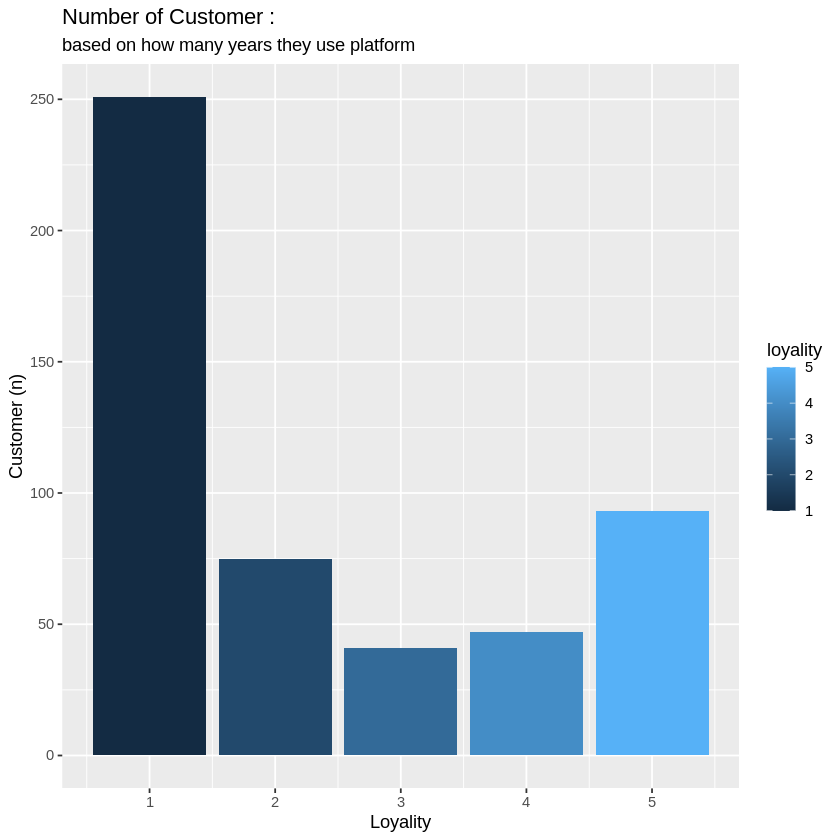

In [26]:
#indentify total transaction value based on customer loyality
loyality %>%
  group_by(loyality) %>%
  summarise(count_cust = n()) %>%
  ggplot(loyality, mapping = aes(x = loyality, y = count_cust, fill = loyality)) +
  geom_col() +
  labs(x ='Loyality', y ='Customer (n)', title = 'Number of Customer :', subtitle = 'based on how many years they use platform')


Joining with `by = join_by(CustomerID)`


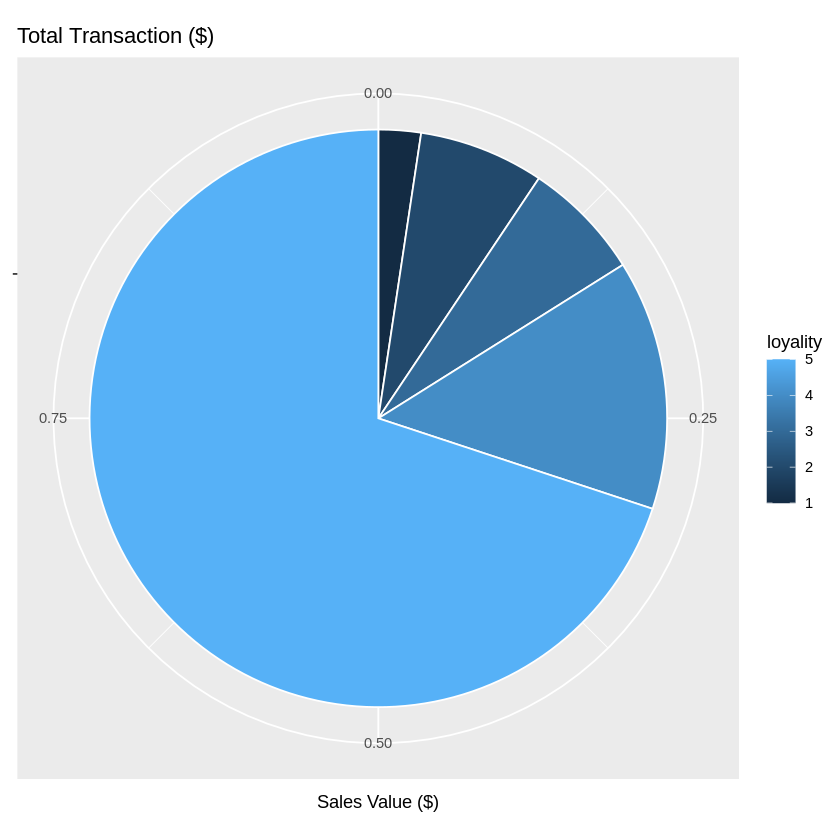

In [27]:
summarize_cust <- {total_sale <- transaction %>%
  group_by(CustomerID) %>%
  summarise(transaction_value = sum(TotalSales))
left_join(loyality,total_sale)
}
#pie chart of total transcation
summarize_cust %>%
  group_by(loyality) %>%
  summarise(total = sum(transaction_value)) %>%
  mutate(percent = total/sum(total)) %>%
  ggplot(summarize_cust, mapping = aes(x = "", y = percent, fill = loyality)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  labs(x = NULL , y ='Sales Value ($)', title = 'Total Transaction ($)')


## 3.10 Is there correlation between discount and customer retention?

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


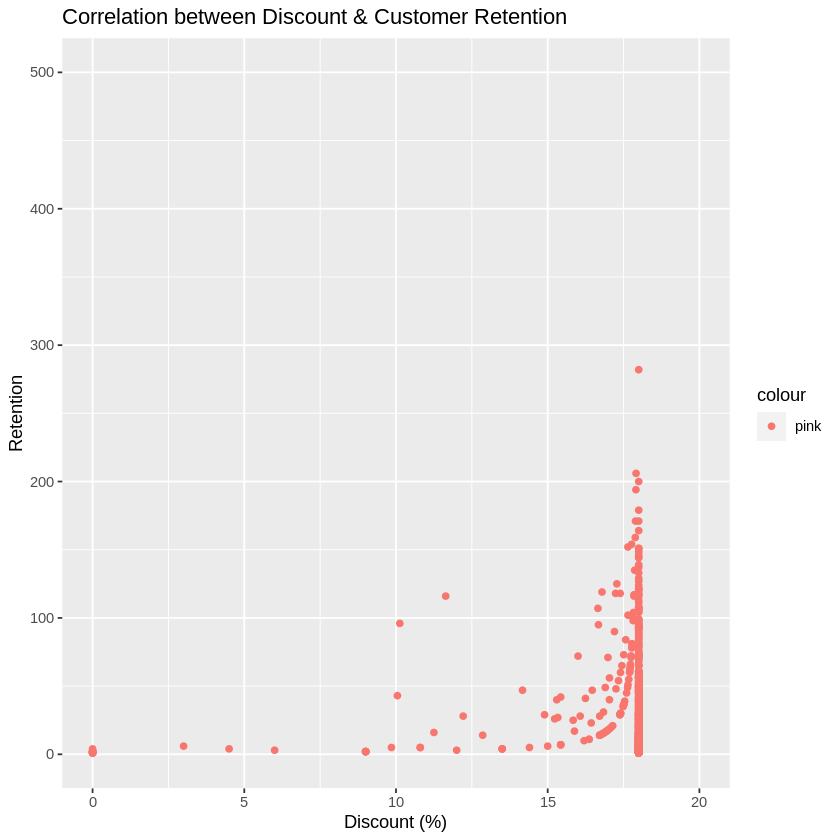

In [28]:
cust_retention %>%
  ggplot(mapping = aes(x = avg_disc*100, y = number_of_trans, color = "pink"), show) +
  geom_point() +
  xlim(c(0, 20)) +
  ylim(c(0, 500)) +
  labs(x ='Discount (%)', y ='Retention', title = 'Correlation between Discount & Customer Retention')


Data that have been visualized above then knitted to a story telling in a presentation. You can check back on the repository.